# Лабораторная работа №4
# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

## Цель лабораторной работы
Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

## Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Постройте модель и оцените качество модели с использованием кросс-валидации.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [91]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Подготовка данных и построение базовых моделей для оценки качества

In [100]:
breast_cancer = load_breast_cancer()

In [97]:
# Наименования признаков
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [103]:
type(breast_cancer.data)

numpy.ndarray

In [104]:
data = pd.DataFrame(data= np.c_[breast_cancer['data'], breast_cancer['target']],
                     columns= breast_cancer['feature_names'].tolist() + ['target'])

In [105]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Разделение выборки на обучающую и тестовую

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=1)

In [107]:
# Размер обучающей выборки
X_train.shape, Y_train.shape

((398, 30), (398,))

In [108]:
# Размер тестовой выборки
X_test.shape, Y_test.shape

((171, 30), (171,))

## Обучение модели ближайших соседей для заданного гиперпараметра K

In [109]:
# 3 ближайших соседа
# Метрика accuracy вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.9472361809045227, 0.9239766081871345)

In [110]:
# 8 ближайших соседей
# Метрика accuracy вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов
cl1_2 = KNeighborsClassifier(n_neighbors=8)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(0.9321608040201005, 0.9415204678362573)

## Построение модели с использованием кросс-валидации

In [111]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         breast_cancer.data, breast_cancer.target, cv=3)

In [112]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.89473684, 0.95263158, 0.91534392])

In [113]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.9209041121321823

In [114]:
# использование метрики precision
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         breast_cancer.data, breast_cancer.target, cv=3,
                        scoring='precision_weighted')
scores, np.mean(scores)

(array([0.89654273, 0.9533197 , 0.91504168]), 0.9216347037536606)

In [116]:
# функция cross_validate позволяет использовать для оценки несколько метрик
scoring = {'precision': 'precision_weighted', 
           'jaccard': 'jaccard_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        breast_cancer.data, breast_cancer.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0., 0., 0.]),
 'score_time': array([0.03152204, 0.01564574, 0.03126574]),
 'test_precision': array([0.89654273, 0.9533197 , 0.91504168]),
 'train_precision': array([0.9585625 , 0.95775754, 0.9533197 ]),
 'test_jaccard': array([0.80818208, 0.9091925 , 0.84433622]),
 'train_jaccard': array([0.91863329, 0.91899267, 0.9091925 ]),
 'test_f1': array([0.89287184, 0.95225452, 0.9150832 ]),
 'train_f1': array([0.95744193, 0.95765583, 0.95225452])}

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [118]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [119]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

Wall time: 686 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [120]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00231314, 0.00184054, 0.00312042, 0.01037116, 0.00315456,
        0.0062571 , 0.0031249 , 0.00624986, 0.        , 0.        ]),
 'std_fit_time': array([0.00079557, 0.00119532, 0.00624084, 0.00866432, 0.00630913,
        0.00766336, 0.00624981, 0.00765448, 0.        , 0.        ]),
 'mean_score_time': array([0.01362453, 0.00723748, 0.01249657, 0.01564269, 0.01246901,
        0.0062501 , 0.00624762, 0.00312676, 0.00937333, 0.00625267]),
 'std_score_time': array([0.01524153, 0.00502408, 0.00624831, 0.0098877 , 0.01167582,
        0.00765478, 0.00765174, 0.00625353, 0.00765331, 0.00765793]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [121]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [122]:
# Лучшее значение метрики
clf_gs.best_score_

0.9270886075949367

In [123]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 20}

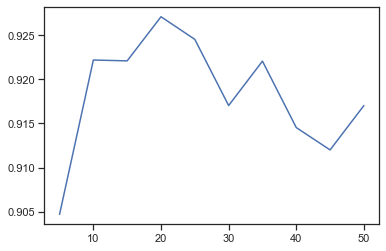

In [124]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

Oптимальный гиперпараметр K = 20